In [1]:
from model import mix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
mix = mix()

## Troubleshoot 1:
ValueError: The number of observations must be larger than the number of variables.

In `make_kde()`

In [4]:
st = pd.read_csv('../data/jvs_models/standard_model.csv')
ro = pd.read_csv('../data/jvs_models/rocrit_model.csv')

stcols = st.columns
rocols = ro.columns
for i in range(5):
    print(stcols[i])
    print('Max:')
    print(st[stcols[i]].max())
    print(ro[rocols[i]].max())    
    print('\n')

# Teff(K)
Max:
6499.998166816108
6399.963150489168


 Prot(days)
Max:
188.7730880701523
107.6670434214183


 Age(Gyr)
Max:
8.510795920574928
8.510795920574928


 Mass(Msun)
Max:
1.97503
1.94384


 Ro 
Max:
5.8235457900807415
4.625265033093918




In [19]:
star1 = {'ID': '6278762', 'mass': [0.7390000000000001, 0.011000000000000001], 'teff': [5046, 74], 'logage': [2.4458192610799534, 0.08496525996193194], 'logprot': [3.4956189286626875, 0.5269712651617979]}

In [20]:
mix.select_down(mass=[star1['mass'][0], star1['mass'][1]*3],
                 teff=[star1['teff'][0], star1['teff'][1]*3],
                 age=[star1['logage'][0], star1['logage'][1]*3])

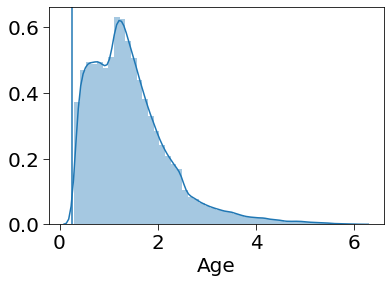

In [27]:
sns.distplot(np.abs(mix.df_rocrit.Age - star1['logage'][0]))
plt.axvline(star1['logage'][1]*3)

In [26]:
mix.sel_rocrit

,Teff,Prot,Age,Mass,Ro


In [4]:
%%time
mix.run_one_star(star1)

ValueError: The number of observations must be larger than the number of variables.

## Test 2:

Now let's run on the sun again, but say that it is 1 Gyr older than it really is. If the solar rotation stopped slowing in the next Gyr, as these fake data would suggest, this would produce a strong posterior in favour of weakened magnetic braking ($P_A \rightarrow 0$).

In [7]:
star2 = {'ID': 'star2', 'mass': [1.0, 0.01], 'teff': [5777.0, 50.0], 
         'logage': [np.log(5.5), 0.02], 'logprot': [np.log(25.5), 0.01]}

CPU times: user 22.5 s, sys: 376 ms, total: 22.8 s
Wall time: 22.2 s


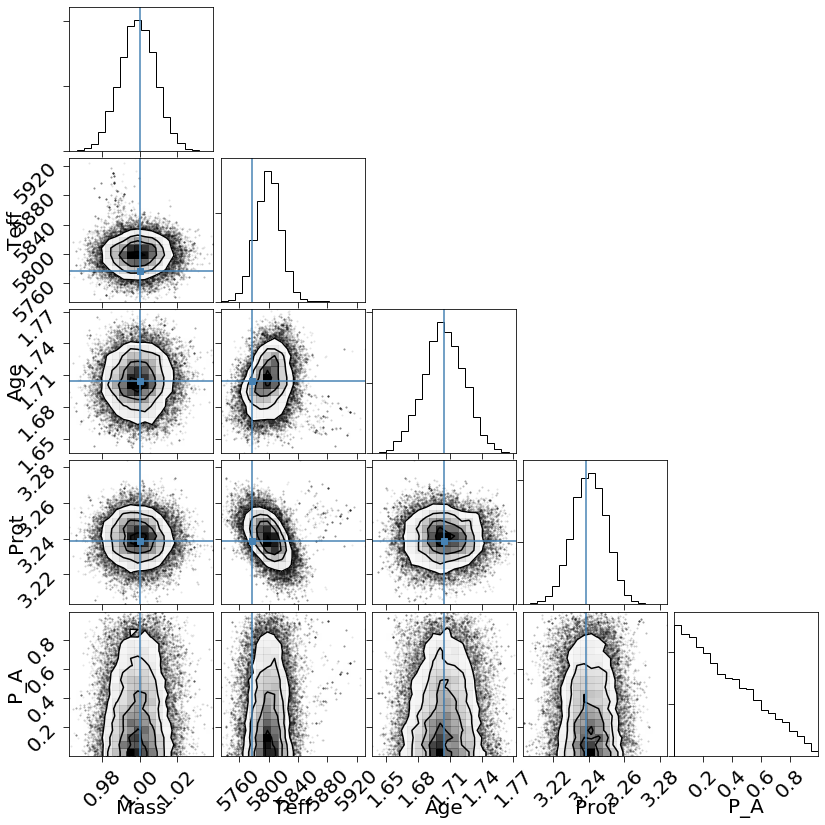

In [8]:
%%time
mix.run_one_star(star2)

As you can see, the second run is favours the weakened magnetic braking model.

## Test 3:

The same again, but with an older sun with a slower rotation. This should produce a strong posterior in favour of **no** weakened magnetic braking ($P_A \rightarrow 1$).

In [17]:
star3 = {'ID': 'star2', 'mass': [1.0, 0.01], 'teff': [5777.0, 50.0], 
         'logage': [np.log(5.5), 0.02], 'logprot': [np.log(32.5), 0.01]}

CPU times: user 22 s, sys: 428 ms, total: 22.5 s
Wall time: 21.9 s


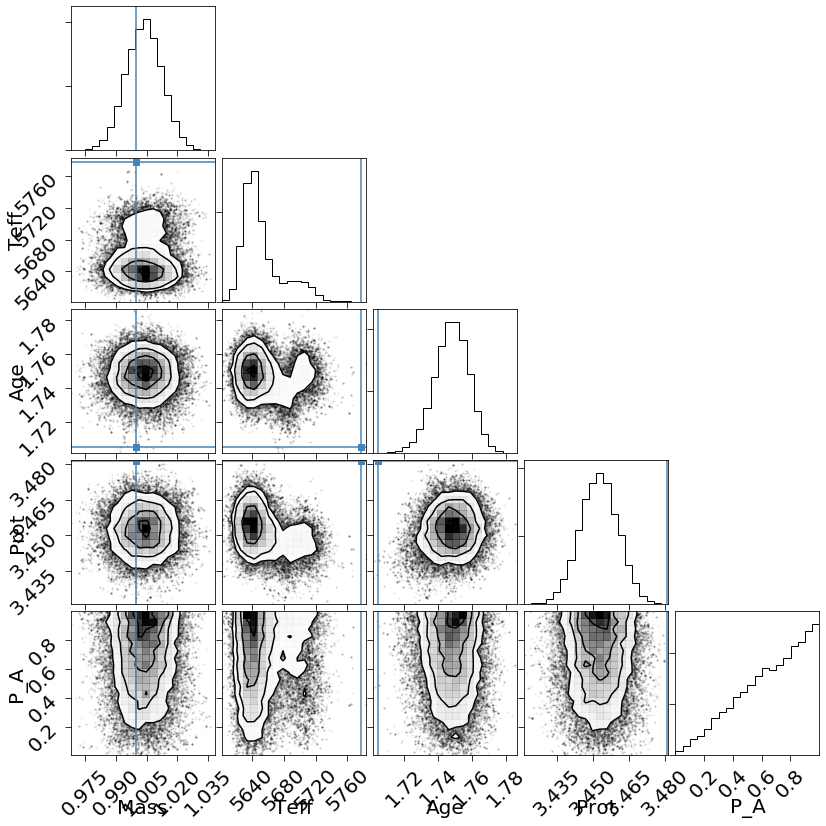

In [18]:
%%time
mix.run_one_star(star3)

As you can see, in this case the posteriors strongly favour the standard magnetic braking model (Skumanich/Kawaler). The posteriors being slightly off is because I just guessed a reasonable value for how the sun would supposedly rotate 1 Gyr from now.